# Decision Trees and Naive Bayes

Welcome to this module on Decision Trees and Naive Bayes! In this notebook, you will explore the foundational concepts and practical applications of these two important machine learning algorithms. Decision Trees are interpretable models that recursively partition the feature space, while Naive Bayes is a probabilistic classifier based on Bayes' theorem and the assumption of feature independence.

You will learn about the theory, optimality criteria, practical implementation, hyperparameter tuning, and model evaluation. By the end of this module, you will have a strong grasp of both the theory and practice of Decision Trees and Naive Bayes in machine learning.

---

# Topics Covered

1. **Introduction to Decision Trees:** Overview, structure, and key concepts.
2. **Criterion for Optimality:** Gini, Entropy, Information Gain, and MSE.
3. **Decision Tree for Classification:** Example with Telco Customer Churn.
4. **Decision Tree for Regression:** Example with Air Quality data.
5. **Pruning and Overfitting:** Pre-pruning, post-pruning, and bias-variance tradeoff.
6. **Feature Importance and Diagnostics:** Feature importances, decision paths, and outlier effects.
7. **Attribute Selection Techniques:** ID3, C4.5, CART, and others.
8. **Fine Tuning and Embeddings:** Hyperparameter tuning and categorical embeddings.
9. **Introduction to Naive Bayes:** Bayes' theorem, types, and Laplace smoothing.
10. **Naive Bayes for Classification:** Example with hospital appointment data.
11. **Comparison and Practical Tips:** Decision Trees vs. Naive Bayes, model selection, and evaluation.
12. **Summary and Self-Assessment:** Key takeaways and review questions.

---

## 1. Decision Trees

Decision Trees are supervised learning algorithms used for both classification and regression tasks. They work by recursively partitioning the feature space into regions with increasingly homogeneous target values.

### 1.1. Structure of a Decision Tree

A Decision Tree consists of:
- **Root Node**: The topmost node representing the entire dataset.
- **Internal Nodes**: Nodes where the data is split based on a feature.
- **Leaf Nodes**: Terminal nodes that output the prediction.

The tree is built by selecting the best feature and threshold to split the data at each node, aiming to maximize the homogeneity of the resulting subsets.

### 1.2. Criterion for Optimality

The optimality of a split in a Decision Tree is determined by a criterion that measures the quality of the split. Common criteria include:

- **Gini Impurity** (for classification):

$$
Gini(S) = 1 - \sum_{i=1}^C p_i^2
$$

where $p_i$ is the proportion of class $i$ in set $S$.

- **Entropy** (Information Gain):

$$
Entropy(S) = -\sum_{i=1}^C p_i \log_2 p_i
$$

- **Information Gain**:

$$
IG(S, A) = Entropy(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} Entropy(S_v)
$$

- **Mean Squared Error (MSE)** (for regression):

$$
MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

The split that results in the largest reduction in impurity (or error) is chosen at each step.

### 1.3. Example: Decision Tree Classification on Telco Customer Churn

We will use the `WA_Fn-UseC_-Telco-Customer-Churn.csv` dataset to demonstrate Decision Tree classification. The goal is to predict customer churn based on various features.

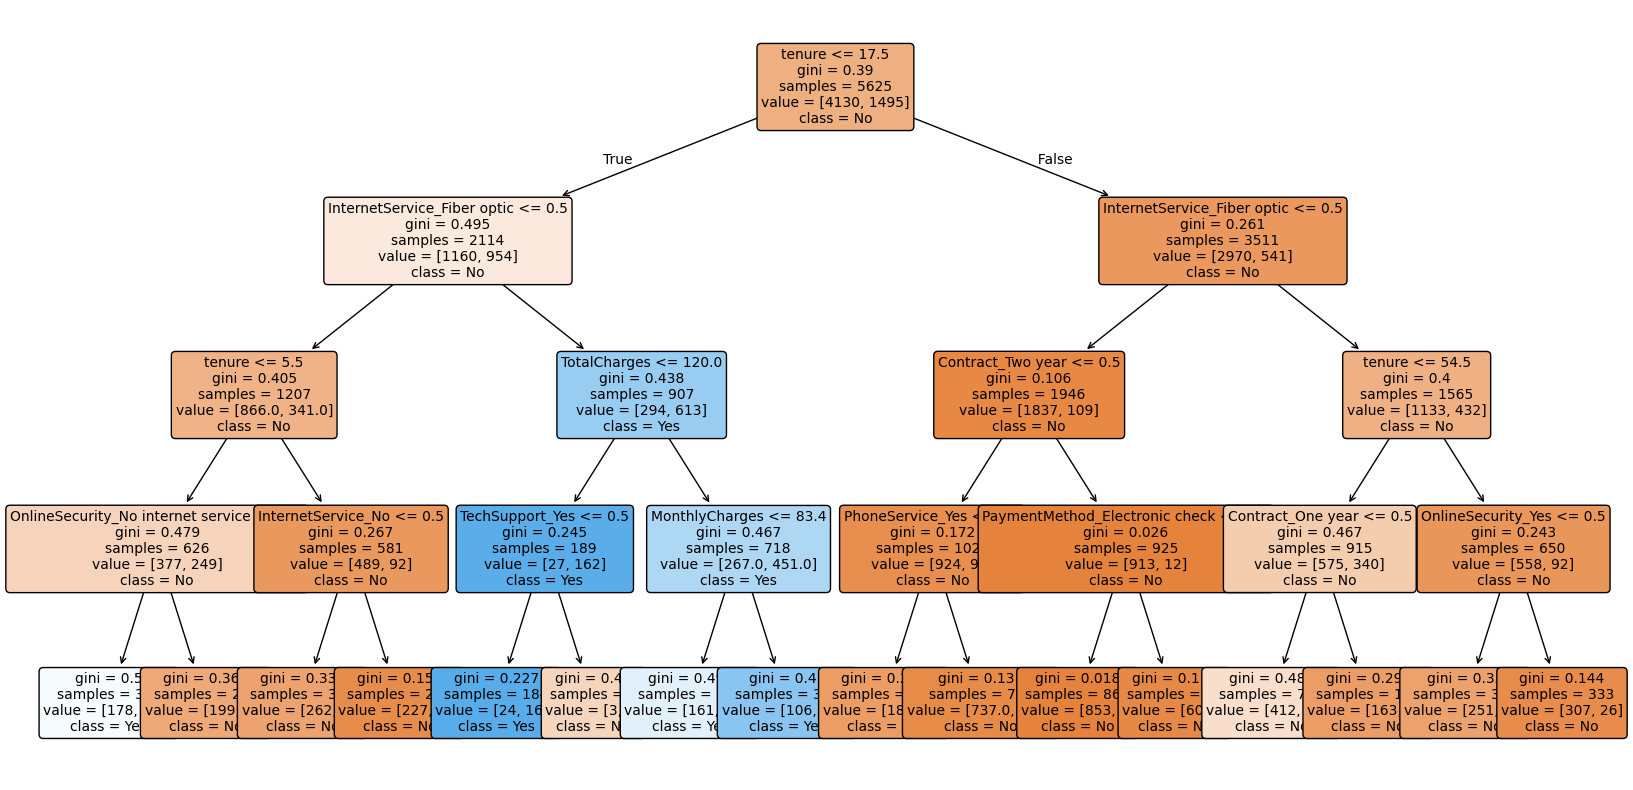

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Preprocessing: Drop customerID and handle missing values
df = df.drop('customerID', axis=1)
df = df[df['TotalCharges'] != ' ']
df['TotalCharges'] = df['TotalCharges'].astype(float)

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Features and target
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True, fontsize=10)
plt.show()

#### Evaluation

In [2]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[907 126]
 [177 197]]
              precision    recall  f1-score   support

       False       0.84      0.88      0.86      1033
        True       0.61      0.53      0.57       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.78      0.78      1407



### 1.4. Decision Tree Regression Example: Predicting Ozone Levels

We will use the `airq` dataset (see the Decision Tree notebook) to demonstrate regression. Here, we predict ozone levels based on environmental features.

Mean Squared Error: 2443803.56


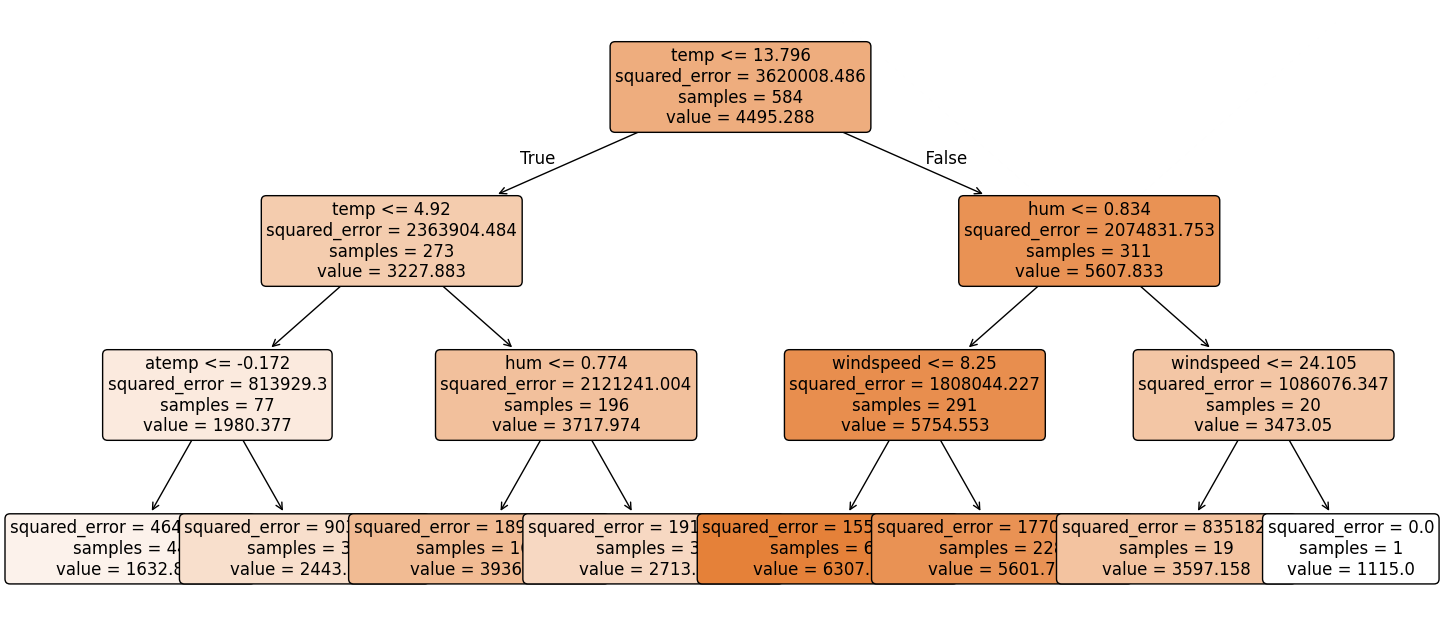

In [7]:
# Load air quality data
# The file has columns: index, instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, tot
# We'll use only the numeric weather features for regression (e.g., temp, atemp, hum, windspeed)

airq = pd.read_csv('data/day1.csv')

# Select only numeric weather features as X and 'tot' as the target
y = airq['tot']
X = airq[['temp', 'atemp', 'hum', 'windspeed']]

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train Decision Tree Regressor
reg = DecisionTreeRegressor(max_depth=3, random_state=0)
reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Plot the tree
plt.figure(figsize=(18,8))
plot_tree(reg, filled=True, feature_names=X.columns, rounded=True, fontsize=12)
plt.show()

### 1.5. Pruning in Decision Trees

Pruning reduces the size of a decision tree by removing sections that provide little power to classify instances. This helps prevent overfitting.

- **Pre-pruning (Early Stopping):** Stop growing the tree before it perfectly classifies the training set (e.g., by setting `max_depth`, `min_samples_split`).
- **Post-pruning:** Grow the full tree and then remove branches that have little importance, often using a validation set.

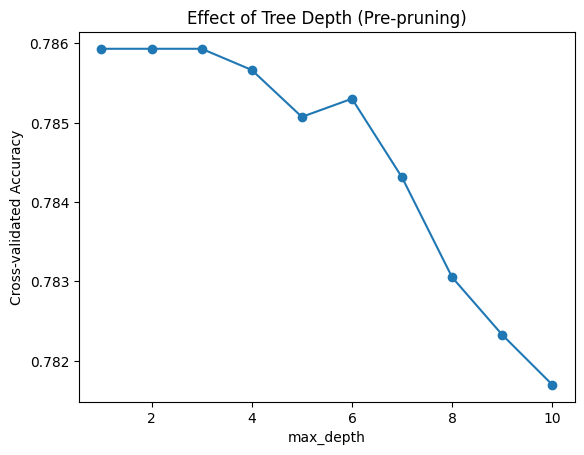

In [14]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

max_depths = range(1, 11)
scores = []
# Dynamically set n_splits to avoid ValueError
min_class_count = np.bincount(y_train if hasattr(y_train, 'values') == False else y_train.values).min()
n_splits = min(5, min_class_count)
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
for d in max_depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    score = cross_val_score(clf, X_train, y_train, cv=skf).mean()
    scores.append(score)

plt.plot(max_depths, scores, marker='o')
plt.xlabel('max_depth')
plt.ylabel('Cross-validated Accuracy')
plt.title('Effect of Tree Depth (Pre-pruning)')
plt.show()

### 1.6. Feature Importance in Decision Trees

Decision Trees can estimate the importance of each feature in prediction. Features used closer to the root are generally more important.

Model not fitted. Fitting now...


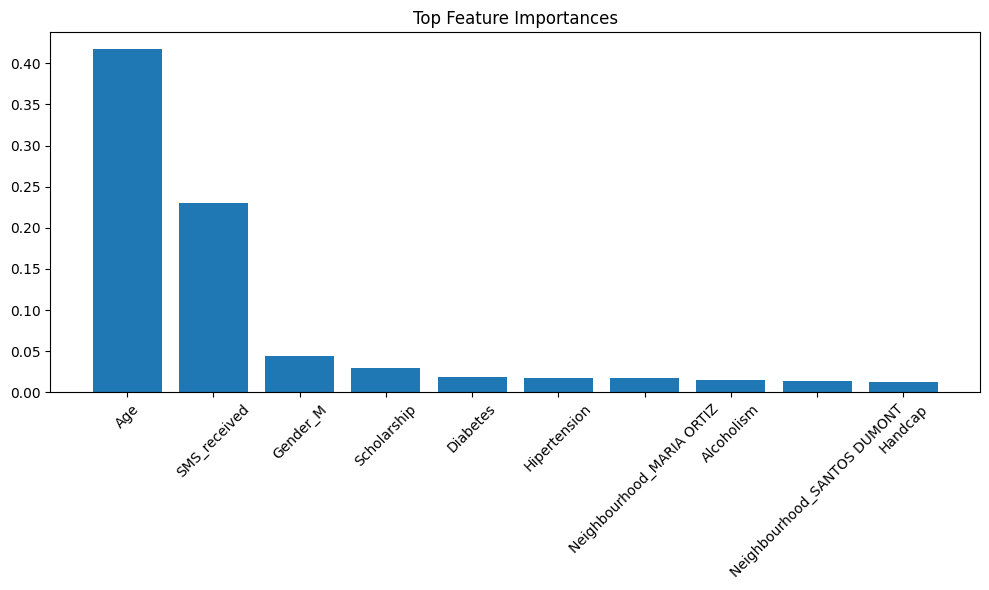

In [16]:
def plot_feature_importance(model, feature_names, n=10):
    importances = model.feature_importances_
    indices = np.argsort(importances)[-n:][::-1]
    plt.figure(figsize=(10,6))
    plt.title('Top Feature Importances')
    plt.bar(range(n), importances[indices], align='center')
    plt.xticks(range(n), [feature_names[i] for i in indices], rotation=45)
    plt.tight_layout()
    plt.show()

# Ensure the model is fitted before plotting feature importances
# If running this cell independently, fit the model first
try:
    plot_feature_importance(clf, X.columns)
except Exception as e:
    print("Model not fitted. Fitting now...")
    clf.fit(X_train, y_train)
    plot_feature_importance(clf, X.columns)

### 1.7. Handling Categorical vs. Continuous Features

- **Categorical features** are split by grouping categories.
- **Continuous features** are split by thresholding (e.g., $x < t$).

Scikit-learn automatically handles both types (after encoding categoricals as numbers).

### 1.8. Overfitting and Bias-Variance Tradeoff

- **Overfitting:** The tree fits noise in the training data, leading to poor generalization.
- **Bias-Variance Tradeoff:** Shallow trees have high bias, deep trees have high variance. Pruning and setting hyperparameters help control this tradeoff.

### 1.9. Decision Path and Leaf Nodes

A decision path is the sequence of nodes traversed from the root to a leaf for a given sample. Each leaf node represents a region of the feature space with a specific prediction (mean for regression, class for classification).

In [17]:
# Ensure clf is fitted before using decision_path and predict
try:
    sample = X_test.iloc[[0]]
    node_indicator = clf.decision_path(sample)
    print("Decision path (node indices):", node_indicator.indices)
    print("Predicted class:", clf.predict(sample))
except AttributeError as e:
    print("Model not fitted. Fitting now...")
    clf.fit(X_train, y_train)
    sample = X_test.iloc[[0]]
    node_indicator = clf.decision_path(sample)
    print("Decision path (node indices):", node_indicator.indices)
    print("Predicted class:", clf.predict(sample))

Decision path (node indices): [  0 446 686 687 688 689 690 691 692 693 694]
Predicted class: [0]


### 1.10. Diagnostics: Effects of Outliers

Outliers can affect the splits and predictions of decision trees, especially in regression. Using alternative criteria like MAE (mean absolute error) can make the tree more robust to outliers.

In [10]:
reg_mae = DecisionTreeRegressor(criterion='absolute_error', max_depth=3, random_state=0)
reg_mae.fit(X_train, y_train)
y_pred_mae = reg_mae.predict(X_test)
print("MSE (MAE criterion):", mean_squared_error(y_test, y_pred_mae))

MSE (MAE criterion): 2589544.6649659863


### 1.11. Embeddings for Categorical Variables

Embeddings can be used to represent high-cardinality categorical variables as continuous vectors, capturing similarities between categories. This is especially useful for tree-based models when one-hot encoding is inefficient.

### 1.12. Tree-Based Analysis on Real-World Data

Tree-based models can be applied to various real-world datasets, such as NYC taxi trip duration prediction, forest cover type classification, and more. These examples demonstrate the flexibility and interpretability of decision trees.

### 1.13. Attribute Selection Techniques

Different algorithms use various attribute selection measures to determine the best split at each node:
- **ID3**: Uses entropy and information gain
- **C4.5**: Uses gain ratio
- **CART**: Uses Gini index (classification) or variance reduction (regression)
- **CHAID**: Uses chi-square statistics
- **MARS**: Uses multivariate adaptive regression splines

The choice of criterion affects the structure and performance of the tree.

### 1.14. Fine Tuning Decision Trees

Hyperparameters such as `min_samples_split`, `min_samples_leaf`, and `max_features` can be tuned to optimize tree performance and control overfitting.

In [11]:
from sklearn.model_selection import GridSearchCV
params = {'min_samples_leaf': [1, 5, 10, 20]}
gs = GridSearchCV(DecisionTreeRegressor(random_state=0), params, cv=5)
gs.fit(X_train, y_train)
print("Best min_samples_leaf:", gs.best_params_)

Best min_samples_leaf: {'min_samples_leaf': 20}


---

## 2. Naive Bayes Classifier

Naive Bayes is a family of probabilistic classifiers based on Bayes' theorem, assuming independence between features. It is especially effective for text classification and categorical data.

### 2.1. Bayes' Theorem

Bayes' theorem describes the probability of a class $C$ given features $X$:

$$
P(C|X) = \frac{P(X|C)P(C)}{P(X)}
$$

In Naive Bayes, we assume features are conditionally independent given the class:

$$
P(C|X_1, ..., X_n) \propto P(C) \prod_{i=1}^n P(X_i|C)
$$

### 2.2. Types of Naive Bayes
- **Gaussian Naive Bayes**: For continuous features (assumes normal distribution)
- **Multinomial Naive Bayes**: For count data (e.g., word counts)
- **Bernoulli Naive Bayes**: For binary features

### 2.3. Example: Naive Bayes Classification on Hospital Appointments

We will use the `KaggleV2-May-2016.csv` dataset, which contains information about hospital appointments and no-shows. We will predict whether a patient will show up for their appointment.

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv('data/KaggleV2-May-2016.csv')

# Preprocessing: Encode categorical variables and target
df['No-show'] = df['No-show'].map({'No': 0, 'Yes': 1})
df = pd.get_dummies(df, columns=['Gender', 'Neighbourhood'], drop_first=True)

# Features and target
X = df.drop(['No-show', 'PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1)
y = df['No-show']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict and evaluate
y_pred = nb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

Accuracy: 0.58


### 2.4. Laplace Smoothing in Naive Bayes

Laplace smoothing avoids zero probabilities for unseen feature values:

$$
P(x_i|C) = \frac{count(x_i, C) + 1}{count(C) + k}
$$

where $k$ is the number of possible values for $x_i$.

In [13]:
# Example: Laplace smoothing with MultinomialNB on a text-like dataset
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

texts = ["spam spam ham", "ham ham eggs", "spam eggs eggs"]
labels = [1, 0, 1]
vec = CountVectorizer()
X_text = vec.fit_transform(texts)

nb = MultinomialNB(alpha=1.0)  # Laplace smoothing
nb.fit(X_text, labels)
print("Class log priors:", nb.class_log_prior_)
print("Feature log prob:", nb.feature_log_prob_)

Class log priors: [-1.09861229 -0.40546511]
Feature log prob: [[-1.09861229 -0.69314718 -1.79175947]
 [-1.09861229 -1.5040774  -0.81093022]]


### 2.5. Naive Bayes for Continuous and Categorical Data

- **Gaussian Naive Bayes**: For continuous features (assumes normal distribution)
- **Multinomial Naive Bayes**: For count data (e.g., text)
- **Bernoulli Naive Bayes**: For binary features

Choose the variant that matches your data type for best results.

### 2.6. Comparison: Decision Trees vs. Naive Bayes

| Aspect                | Decision Trees                | Naive Bayes                |
|-----------------------|------------------------------|----------------------------|
| Interpretability      | High                         | High                       |
| Handles Nonlinearity  | Yes                          | No (linear boundaries)     |
| Feature Independence  | Not required                 | Assumed                    |
| Handles Missing Data  | Yes (some implementations)   | No (requires imputation)   |
| Sensitive to Outliers | Yes                          | Less so                    |
| Works with Text Data  | No (unless vectorized)       | Yes                        |

Choose based on data characteristics and problem requirements.

### 2.7. Practical Tips for Model Selection and Evaluation

- Always preprocess data (handle missing values, encode categoricals).
- Use cross-validation to tune hyperparameters.
- Compare multiple models and use metrics appropriate for your task (accuracy, F1, ROC-AUC, etc.).
- Visualize results and feature importances for interpretability.

## 3. Summary and Self-Assessment

- Decision Trees partition the feature space to make predictions, using criteria like Gini impurity, entropy, or MSE for optimal splits.
- Naive Bayes applies Bayes' theorem with the assumption of feature independence, making it efficient for high-dimensional data.
- Both methods are interpretable and widely used for classification tasks.

### Review Questions
- What is the main idea behind Decision Trees and Naive Bayes?
- How do you select the best split in a Decision Tree?
- What are the key hyperparameters for tuning Decision Trees?
- When would you use Naive Bayes over Decision Trees?
- Write the equations for Gini, Entropy, and Bayes' theorem.